## Hash : 해시 테이블
- 해시 충돌의 대처 방법
    - 체인법 : 원소의 해시 값이 일치하는 경우, 리스트로 관리
    - 오픈 주소법(오픈 어드레싱) : 빈 버킷을 찾을 때까지 해시를 반복 (n+1)... 등

- 해시 테이블의 사용 사례
    - 데이터베이스 인덱싱, 캐싱, 집합 연산, 중복 제거 등에 사용
    - 해시 테이블은 빠른 검색, 삽입, 삭제가 필요할 때 유용하다.

In [1]:
# 체인법의 예

class HashTable:
    def __init__(self):
        self.table = [[] for _ in range(10)]      # 해시 테이블의 크기를 정의

    def _hash(self, key):
        return hash(key) % len(self.table)        # 해시 함수의 정의 : 키 / 테이블 크기의 나머지 값

    def insert(self, key, value):
        index = self._hash(key)                   # 삽입 함수의 구현
        self.table[index].append((key, value))    # 체인법 : 해시 충돌을 방지하기 위하여 (key, value)를 동일한 index에 apppend 처리

    def search(self, key):                        # 검색(찾기) 함수의 구현
        index = self._hash(key)                   # 입력된 키 값을 해시 함수를 거처 인덱스 계산
        for k, v in self.table[index]:            # 해당 인덱스에 여러 개의 (key, value)가 리스트로 저장되어 있는 경우를 가정
            if k == key:
                return v                          # 체인된 리스트를 순회하며 일치하는 key 값이 있는 경우 value를 반환
        return None

student_table = HashTable()

student_table.insert(11, "Jane")
student_table.insert(21, "John")                  # Jane과 John은 동일한 index에 저장된다. Hash 연산에서 결과 1 이므로,
student_table.insert(2, "Michael")          

In [2]:
student_table.table

[[],
 [(11, 'Jane'), (21, 'John')],
 [(2, 'Michael')],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [3]:
# 동일한 index에 하나의 리스트로 연결되어(Chinded) 있으나,
# 검색하는데 문제는 없다. (240523)

student_table.search(21)

'John'

In [5]:
# 연결된 리스트를 추출하는 방법

student_table.table[1][1]

(21, 'John')

### 스택과 큐 : 복잡도(Complexity - Time/Space)
- 파이썬에서는 덱(Deque)을 주로 사용
- 내장 모듈인 collections에 있으며, 스태과 큐를 합쳐놓은 듯한 자료 구조
- 덱은 Double Embeded QUEue의 약자, 리스트에서 가장 앞에 있는 데이터를 꺼내기 위해서는 pop(0)를 사용
- deque에서는 popleft() 함수를 사용, 이 함수를 사용해도 pop(0)처럼 비효율적이지 않고 O(1)의 시간 복잡도(Time Complexity)를 가진다.

In [7]:
from collections import deque

dq = deque()       # 덱 생성

# 앞/뒤로 데이터를 추가하고 
# 앞/뒤로 데이터를 꺼내기

dq.append(1)        # dq에 뒤로 데이터 넣기
dq.appendleft(2)    # dq에 앞으로 데이터 넣기

print(dq)

print(dq.pop())
print(dq.popleft())

deque([2, 1])
1
2


In [8]:
# 위 명령에서 덱에서 모든 원소를 꺼내어 비어 있는 상태 : 에러 메세지 출력

print(dq.pop())
print(dq.popleft())

IndexError: pop from an empty deque

### deque는 일반적인 리스트가 아니다.
- 리스트 객체도 비슷한 연산을 지원하지만, 빠른 고정 길이 연산에 최적화되어 있다.
- 기본 데이터의 크기와 위치를 변경하는 팝과 삽인 연산에 O(n)의 메모리 이동 비용이 발생한다.

In [9]:
dq_2 = deque()

for i in range(10):
    dq_2.append(i)

print(dq_2)

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [11]:
for i in range(10):
    print(dq_2.popleft())

0
1
2
3
4
5
6
7
8
9


In [13]:
print(dq_2)    # 모든 요소를 다 꺼낸 상태로 덱은 비어있다.

deque([])


In [14]:
# 앞/뒤로 데이터 채우기

for i in range (10):
    dq_2.appendleft(i)
    dq_2.append(10-i)

print(dq_2)

deque([9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])


### dqque를 이용하여 리스트 회전하기

In [15]:
from collections import deque

list_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dq_test = deque(list_test)      # 리스트를 덱으로 정의
dq_test.rotate(2)               # 2칸 만큼 회전(시계방향, 양수  입력)

dq_test

deque([9, 10, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
# 응용 : 리스트의 가운데 있는 숫자 '3'을 꺼내는 방법
# 리스트의 형태는 그대로 유지하고,
# Time/Space Complexity를 최소화 하는 방법 : 회전

from collections import deque

test = [1, 2, 3, 4, 5]       # 한 가운데 있는 '3'을 꺼내는 문제
dq = deque(test)

dq.rotate(3)
print(dq.popleft())          # 회전 후, 리스트 맨 앞의 요소 꺼내기

dq.rotate(-2)                # 원래 모양으로 변경, 반대로 회전. 단, 1개의 요소를 꺼냈으므로 반시계 방향으로 (n-1 = -2)만큼 회전
test = list(dq)              # 리스트 형태로 원복

test

3


[1, 2, 4, 5]

In [ ]:
# 한 가운데 '3'이 제거된 리스트를 출력함 (240522)

### 재귀 함수

In [17]:
# Factorial
# math.factorial()

def factorial(n):
    if n > 0:
        return n * factorial(n-1)
    else:
        return 1

factorial(5)

120

In [18]:
# 재귀 알고리즘의 실시간 모니터링

def factorial(n):
    print("n= ", n)
    
    if n > 0:
        a = n * factorial(n-1)
        print("factorual -ing = ", a)
        return a
    else:
        return 1

factorial(5)

n=  5
n=  4
n=  3
n=  2
n=  1
n=  0
factorual -ing =  1
factorual -ing =  2
factorual -ing =  6
factorual -ing =  24
factorual -ing =  120


120

In [ ]:
# Factoral 계산 결과 (a) 출력 확인 -> 왜 이 순서대로 출력되는가? (240523)

In [19]:
# gcd 재귀 함수 : 유클리드 호제법

def GCD_recursion(num1, num2):

    if num2 == 0:
        return num1

    else:
        print("num1 = ", num1, "num2 = ", num2)
        return GCD_recursion(num2, num1%num2)        

GCD_recursion(112, 189)   # 입력 순서가 바뀌어도 상관없다. % 연산의 결과 (240523)

num1 =  112 num2 =  189
num1 =  189 num2 =  112
num1 =  112 num2 =  77
num1 =  77 num2 =  35
num1 =  35 num2 =  7


7

In [20]:
12%5

2

In [21]:
5%12

5

In [22]:
def GCD_recursion(num1, num2):

    if num2 == 0:
        return num1

    else:
        print("num1 = ", num1, "num2 = ", num2)
        return GCD_recursion(num2, num1%num2)        

GCD_recursion(189, 112)   # 입력 순서가 바뀌어도 상관없다. % 연산의 결과 (240523)

num1 =  189 num2 =  112
num1 =  112 num2 =  77
num1 =  77 num2 =  35
num1 =  35 num2 =  7


7

In [1]:
# 응용 : 회전하는 덱으로 로또 번호 추출하기

from collections import  deque
import random

list = []*45     # 랜덤 회전으로 선택할 1~45 사이의 숫자 리스트

for i in range(45):
    list.append(i+1)

# 기 회차 당첨 번호 지우기
list.remove(2)
list.remove(19)
list.remove(26)
list.remove(31)
list.remove(38)
list.remove(34)


dq = deque(list)

lotto = []*6       # 6개의 로또 번호를 저장할 리스트

for i in range(6):
    dq.rotate(random.randint(0, 45))   # 0~45 사이의 랜덤 회전
    a = dq.popleft()                   # 회전 후, 맨 앞의 숫자 꺼내기
    lotto.append(a)

lotto.sort()                           # 선택된 6개의 숫자를 정렬
lotto

[7, 11, 16, 23, 28, 32]

### 재귀함수 : 하노이 탑 문제

In [4]:
def hanoi(x, start, aux, end):
    global answer     # 글로벌 변수 : 함수를 탈출해도 변수 값은 유지

    # 종료 조건 정의
    if x == 1:
        answer.append([start, end])   # 조각의 이동 경로를 기록
        return   

    # x-1개를 보조에 먼저 옮기기
    hanoi(x-1, start, end, aux)

    # 남은 1개를 목표에 옯기기
    answer.append([start, end])

    # 보조의 x-1개를 목표로 옮기기
    hanoi(x-1, aux, start, end)

answer = []     # 글로벌 함수의 초기화

n = 3
hanoi(n, 1, 2, 3)   # 총 갯수, 시작위치, 보조위치, 끝 위치

for a in enumerate(answer):
    # print(a[1][0])   # 연번 + (start, target) 출력
    print(f'{a[1][0]}의 맨 위에 있는 판을 {a[1][1]}로 이동')
    # 직관적으로 이해하기 위해 문장 형식으로 출력(240529)

1의 맨 위에 있는 판을 3로 이동
1의 맨 위에 있는 판을 2로 이동
3의 맨 위에 있는 판을 2로 이동
1의 맨 위에 있는 판을 3로 이동
2의 맨 위에 있는 판을 1로 이동
2의 맨 위에 있는 판을 3로 이동
1의 맨 위에 있는 판을 3로 이동


### 정렬 1 : Bubble Sorting (240529)

In [2]:
# 코드 직접 작성

list = [10, 9, 4, 2, 3, 6, 5, 7, 1, 8, 0]
n = len(list)

for j in range(n-1):
    print(f'The start of {j}th Pass.')

    for i in range(n-1):
        
        if list[i] > list[i+1]:
            temp = list[i+1]     # 자리 교환 방법 (옛날 방법)
            list[i+1] = list[i]
            list[i] = temp
        
        print(list)

The start of 0th Pass.
[9, 10, 4, 2, 3, 6, 5, 7, 1, 8, 0]
[9, 4, 10, 2, 3, 6, 5, 7, 1, 8, 0]
[9, 4, 2, 10, 3, 6, 5, 7, 1, 8, 0]
[9, 4, 2, 3, 10, 6, 5, 7, 1, 8, 0]
[9, 4, 2, 3, 6, 10, 5, 7, 1, 8, 0]
[9, 4, 2, 3, 6, 5, 10, 7, 1, 8, 0]
[9, 4, 2, 3, 6, 5, 7, 10, 1, 8, 0]
[9, 4, 2, 3, 6, 5, 7, 1, 10, 8, 0]
[9, 4, 2, 3, 6, 5, 7, 1, 8, 10, 0]
[9, 4, 2, 3, 6, 5, 7, 1, 8, 0, 10]
The start of 1th Pass.
[4, 9, 2, 3, 6, 5, 7, 1, 8, 0, 10]
[4, 2, 9, 3, 6, 5, 7, 1, 8, 0, 10]
[4, 2, 3, 9, 6, 5, 7, 1, 8, 0, 10]
[4, 2, 3, 6, 9, 5, 7, 1, 8, 0, 10]
[4, 2, 3, 6, 5, 9, 7, 1, 8, 0, 10]
[4, 2, 3, 6, 5, 7, 9, 1, 8, 0, 10]
[4, 2, 3, 6, 5, 7, 1, 9, 8, 0, 10]
[4, 2, 3, 6, 5, 7, 1, 8, 9, 0, 10]
[4, 2, 3, 6, 5, 7, 1, 8, 0, 9, 10]
[4, 2, 3, 6, 5, 7, 1, 8, 0, 9, 10]
The start of 2th Pass.
[2, 4, 3, 6, 5, 7, 1, 8, 0, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 0, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 0, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 0, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 0, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 0, 9, 10]
[2, 3, 4, 5, 6, 1, 7,

In [4]:
# 파이썬 만의 독특한 자리 교환 방법

# list = [10, 9, 4, 2, 3, 6, 5, 7, 1, 8, 0]
list = [4, 2, 3, 6, 9, 10, 5, 7, 1, 8]

n = len(list)

for j in range(n-1):
    print(f'The start of {j}th Pass.')

    for i in range(n-1):
        
        if list[i] > list[i+1]:
            list[i], list[i+1] = list[i+1], list[i]   # 파이썬 만의 독특한 자리 교환 방법
        
        print(list)


The start of 0th Pass.
[2, 4, 3, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 5, 10, 7, 1, 8]
[2, 3, 4, 6, 9, 5, 7, 10, 1, 8]
[2, 3, 4, 6, 9, 5, 7, 1, 10, 8]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
The start of 1th Pass.
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 5, 9, 7, 1, 8, 10]
[2, 3, 4, 6, 5, 7, 9, 1, 8, 10]
[2, 3, 4, 6, 5, 7, 1, 9, 8, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
The start of 2th Pass.
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
The start of 3th Pass.
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5,

### 버블 정렬의 종료 조건
- 패스에서 단 한번의 교환도 일어나지 않는 경우

In [28]:
# list = [10, 9, 4, 2, 3, 6, 5, 7, 1, 8, 0]
list = [4, 2, 3, 6, 9, 10, 5, 7, 1, 8]

n = len(list)
print(n)

for j in range(n-1):
    print(f'The start of {j}th Pass.')
    count = 0                          # 원소 교환이 발생하는 횟수 
    
    for i in range(n-1):
        
        if list[i] > list[i+1]:
            list[i], list[i+1] = list[i+1], list[i]   # 파이썬 만의 독특한 자리 교환 방법
            count = count+1    # 원소의 자리 교환이 발생할 때마다 1씩 증가

        print(list)
               
    if count == 0:
        print("No exchange!")
        break
            
    print(count)
        

        

10
The start of 0th Pass.
[2, 4, 3, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 10, 5, 7, 1, 8]
[2, 3, 4, 6, 9, 5, 10, 7, 1, 8]
[2, 3, 4, 6, 9, 5, 7, 10, 1, 8]
[2, 3, 4, 6, 9, 5, 7, 1, 10, 8]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
6
The start of 1th Pass.
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 9, 5, 7, 1, 8, 10]
[2, 3, 4, 6, 5, 9, 7, 1, 8, 10]
[2, 3, 4, 6, 5, 7, 9, 1, 8, 10]
[2, 3, 4, 6, 5, 7, 1, 9, 8, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
4
The start of 2th Pass.
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 6, 5, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 1, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
2
The start of 3th Pass.
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2,

In [ ]:
# 패스 7에서 교환이 발생하지 않았는데 왜 '1'값이 뜨는가? (240531)

In [1]:
# list = [10, 9, 4, 2, 3, 6, 5, 7, 1, 8, 0]
# list = [4, 2, 3, 6, 9, 10, 5, 7, 1, 8]
list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]

n = len(list)
print(n)

for j in range(n-1):
    print(f'The start of {j}th Pass.')
    count = 0                          # 원소 교환이 발생하는 횟수 
    
    for i in range(n-1):
        
        if list[i] > list[i+1]:
            list[i], list[i+1] = list[i+1], list[i]   # 파이썬 만의 독특한 자리 교환 방법
            count = count+1    # 원소의 자리 교환이 발생할 때마다 1씩 증가

        print(list)
               
    if count == 0:
        print("No exchange!")
        break
            
    print(count)

11
The start of 0th Pass.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1
The start of 1th Pass.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
No exchange!


In [ ]:
# 9th Pass의 경우, 시작과 동시에 교환이 발생 -> Count 증가
# 비교 횟수를 더 줄일 수 있는 버블 정렬의 개선 방안 있는가?

In [ ]:
# 필수 sort(정렬) 알고리즘 : 삽입, 선택, 버블, 셀, 퀵, 머지(병합)

'''
- 기초지만 성능이 좀 떨어지는(정석) : 선택, 삽입, 버블 정렬
- 개선되서 성능이 좋은 : 셀, 퀵 정렬(퀵은 일반적인 경우에 거의 다른 nlogn 보다 빠름
- 성능 좋고 다른 곳에서도 응용 많이 되는 것 : 머지(병합), 힙
'''

### 퀵 정렬
- 문제를 더 작은 문제로 쪼개서 해결하는 분할 정복(divide and conquer) 알고리즘
- 속도가 빠르다.
- 합병 정렬과 달리 추가 메모리 공간이 필요없다.
- 불안정 정렬이다. (의미?)
- 반할(divide) -> 정복(conquer) -> 결합(merge)

In [ ]:
# 피벗 - 배열에서 한 원소를 선택한다.
# 피벗보다 작은 값 - low 리스트에 저장
# 피벗보다 큰 값 - high 리스트에 저장

# 각각의 분할된 리스트를 같은 방법으로 low와 high로 분할
# 위의 과정을 반복 ---> 재귀 함수 사용

In [3]:
list = [24, 26, 2, 16, 32, 31, 35]

pivot = list[0]   # 첫번째 원소를 피벗으로 정한다.

low = []       # 피벗보다 작인 원소를 저장하기 위한 빈 리스트 선언
high = []      # 피벗보다 큰 원소를 저장하기 위한 빈 리스트 선언

for val in list[1:]:       # 피벗으로 선택된 맨 앞을 리스트를 제외하고 탐색
    if val < pivot:
        low.append(val)

    else:
        high.append(val)

sorted_list = low + [pivot] + high
sorted_list

[2, 16, 24, 26, 32, 31, 35]

In [8]:
# 정렬이 완료되지 않았다. (240531)

# 위의 알고리즘을 함수로 정의하고 -> return에서 재귀함수가 되도록 만든다.
# 위의 과정을 계속해서 반복하게 만든다.

def qsort(list):
    if len(list) < 2:      # 분할된 리스트를 더 쪼갤 수 없는 경우, 리스트를 반환 (종료조건)
        return list

    pivot = list[0]
    low = []
    high = []

    for val in list[1:]:
        if val < pivot:
            low.append(val)

        else:
            high.append(val)

    print(f'{low} + {[pivot]} + {high}')   # 알고리즘의 진행과정을 실시간 모니터링

    return qsort(low) + [pivot] + qsort(high)   # 재귀함수로 low, high를 입력으로 반복

list = [24, 26, 2, 16, 32, 31, 35]
qsort(list)

[2, 16] + [24] + [26, 32, 31, 35]
[] + [2] + [16]
[] + [26] + [32, 31, 35]
[31] + [32] + [35]


[2, 16, 24, 26, 31, 32, 35]

In [ ]:
# 재귀함수의 실사긴 모니터링(출력) 결과 이해 안됨
# 왜 리스트의 출력 결과와 위와 같은가? (240602)

#### 이진탐색 트리(BSTree)
- 모든 왼쪽 서브 트리의 노드는 루트 노드보다 작다.
- 모든 오른쪽 서브 트리의 노드는 루트 노드보다 크다.
- 왼쪽과 오른쪽 서브 트리도 모두 이진 탐색 트리다.
- 중복 노드는 없다.

#### 특정값을 찾는 메서드 만들기 : Contain method
- 찾는 값과 현재 노드의 값을 비교한다.
- 작으면 왼쪽 노드로 이동하고, 크면 오른쪽 노드로 이동한다.
- 이동한 노드의 값과 비교하여 같은 값이면 True를 반환하고, 그렇지 않으면 위의 과정을 반복한다.
- 리프(Leaf) 노드에 도달했는데 찾는 값이 없으면 False를 반환한다.

In [1]:
# BSTree 클래스의 정의

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):
        self.root = None

In [2]:
# BSTree 클래스의 정의 + Contain method

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):             # 클래스에서 디폴트로 선언하는 __init__ 메서드
        self.root = None

    # 탐색 알고리즘
    def __contains__(self, data):  # 클래스에서 데이터가 입력되는 경우 실행하는 기본 메서드
        node = self.root           # 출발은 root에서 시작

        while node:
            if node.data == data:  # 그 노드의 데이터가 찾고자 하는 데이터와 일치하면 True
                return True

            elif node.data > data: # 그 노드의 데이터가 찾고자 하는 데이터 보다 크다면, 왼쪽 하위 노드로 이동
                node = node.left

            else:
                node = node.right  # 그 노드의 데이터가 찾고자 하는 데이터 보다 작다면, 오른쪽 하위 노드로 이동

        return False   # 검색 결과가 없다면 False를 출력

    def inorder(self):
        def _inorder(node):    # 이중 함수 형태 : 이해 안됨(240607)
            if not node:
                return
            _inorder(node.left)
            res.append(node.data)  # 탐색 결과를 순서대로 리스트로 정의
            _inorder(node.right)
        res = []
        _inorder(self.root)
        return res

In [5]:
# 임의의 이진탐색트리를 정의하고,
# 데이터 입력

bst = BSTree()

bst.root = Node(6)
bst.root.left = Node(5)
bst.root.right = Node(9)

bst.root.left.left = Node(2)
bst.root.left.right = Node(4)

bst.root.right.left = Node(7)
bst.root.right.right = Node(8)

In [6]:
bst.inorder()

# 중위 순회 결과 출력

[2, 5, 4, 6, 7, 9, 8]

In [8]:
# 임의의 원소를 검색하는 알고리즘
# 2,3, 6, 9 검색

for x in (2, 3, 6, 9):      # __contains__ 메서드를 호출 (240607)
    if x in bst:
        print(f'{x} is found.')
    else:
        print(f'{x} in NOT found.')

2 is found.
3 in NOT found.
6 is found.
9 is found.


In [9]:
# bst 객체에 저장된 값을 출력하는 방법
# __contains__() 메서드를 직접 호출하여 결과 출력(True / False)
# 값 '1'이 이진 검색 트리에 존재하는가? : False

print(bst.__contains__(1))

False


#### 삽입 알고리즘 : insert method
- root 노드가 비어 있으면, root 노드에 값을 추가한다.
- 삽입할 값과 현재 노드 값을 비교한다.
- 삽입할 값이 작으면 왼쪽 노드를 확인하고 비어 있으면 추가, 아니면 왼쪽으로 이동
- 삽입할 값이 크면 오른쪽 노드를 확인하고 비어 있으면 추가, 아니면 오른쪽 노드로 이동

In [10]:
# BSTree 클래스의 정의 + Contain method + Insert method

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):             # 클래스에서 디폴트로 선언하는 __init__ 메서드
        self.root = None

    # 탐색 알고리즘
    def __contains__(self, data):  # 클래스에서 데이터가 입력되는 경우 실행하는 기본 메서드
        node = self.root           # 출발은 root에서 시작

        while node:
            if node.data == data:  # 그 노드의 데이터가 찾고자 하는 데이터와 일치하면 True
                return True

            elif node.data > data: # 그 노드의 데이터가 찾고자 하는 데이터 보다 크다면, 왼쪽 하위 노드로 이동
                node = node.left

            else:
                node = node.right  # 그 노드의 데이터가 찾고자 하는 데이터 보다 작다면, 오른쪽 하위 노드로 이동

        return False   # 검색 결과가 없다면 False를 출력

    def inorder(self):
        def _inorder(node):    # 이중 함수 형태 : 이해 안됨(240607)
            if not node:
                return
            _inorder(node.left)
            res.append(node.data)  # 탐색 결과를 순서대로 리스트로 정의
            _inorder(node.right)
        res = []
        _inorder(self.root)
        return res

    def insert(self, data):
        if self.root is None:      # 만일 root 노드가 비어있다면 채운다.
            self.root = Node(data)   
            return
        node = self.root

        while True:
            if node.data > data:           # 노드 데이터를 비교했을 때, 데이터 크기가 작고,
                if node.left is None:      # 왼쪽 노드가 비어 있다면,
                    node.left = Node(data) # 노드 클래스를 왼쪽 노드에 저장
                    return
                else:                      # 왼쪽 노드가 비어 있지 않다면, 
                    node = node.left       # 노드 왼쪽으로 이동 후 반복

            else:    # 노드 데이트를 비교했을 때, 데이터 크기가 크고,
                if node.right is None:     # 오른쪽 노드가 비어 있다면,
                    node.right = Node(data) # 오른쪽에 노드 클래스를 저장
                    return
                else:    # 비어 있지 않다면,
                    node = node.right       # 노드 오른쪽으로 이동 후 반복
            

In [11]:
# 임의의 이진탐색트리를 정의하고,
# 데이터를 입력

bst = BSTree()

for x in (6, 4, 9, 2, 5, 7, 8):
    bst.insert(x)

In [12]:
print(bst.root.data)   #루트

6


In [13]:
print(bst.root.left.data)  # 2층 왼쪽 데이터

4


In [15]:
print(bst.root.right.data)  # 2층 오른쪽 데이터

9


In [16]:
print(bst.root.left.left.data)  # 3층 첫번째 데이터

2


In [17]:
print(bst.root.left.right.data)  # 3층 두번째 데이터

5


In [18]:
print(bst.root.right.left.data)  # 3층 세번째 데이터

7


In [19]:
print(bst.root.right.right.data)  # 3층 네번째 데이터 ---> 8은 어디에 저장되어 있는가?

AttributeError: 'NoneType' object has no attribute 'data'

In [20]:
print(bst.root.right.left.right.data)  # 3층 세번째 데이터의 하위 오른쪽 데이터

8


In [ ]:
# 8은 상위노드 7보다 크므로 -> 오른쪽에 배치

In [21]:
for x in (6, 4, 9, 2, 5, 7, 8):   # __contains__ 메서드를 호출하여 원소의 존재 여부 확인
    if x in bst:
        print(f'{x} is found.')
    else:
        print(f'{x} is NOT found.')

6 is found.
4 is found.
9 is found.
2 is found.
5 is found.
7 is found.
8 is found.


#### 이진탐색트리 구조
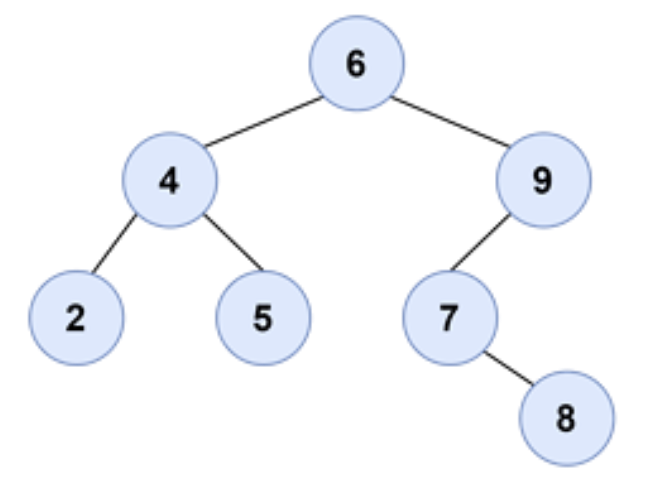

In [ ]:
# 아이디어 : 트리의 위치를 출력할 방법은?

#### 노드 삭제 알고리즘 : del method
- 삭제할 노드가 리프 노드인 경우
- 삭제할 노드의 자식이 하나일 때
- 삭제할 노드의 자식이 둘일 때
- 삭제 후 트리 구조를 재구성하는 문제가 있다.(240607)

### 문자열 검색 : 브루트 포스법 (240611)
- 문자열에서 부분 문자열을 검색하는 알고리즘
- 브루트 포스법, KMP법, 보이어 무어법 등

In [1]:
# 파이썬 표준 문자열 검색 메서드 먼저 학습

# find() : 문자열 찾기
S = 'Spam'
S.find('pa')

1

In [2]:
S.find('ab')

-1

In [3]:
S = 'Spamama'
S.find('ma')

3

In [ ]:
# 문자열을 찾지 못하는 경우 : '-1'을 반환
# 문자열을 찾는 경우 : 그 문자열이 시작되는 인덱스를 반환
# 중복되는 문자열을 찾는 경우 : 첫번째 문자열의 시작 인덱스만 반환(문제점...)

In [4]:
# replace() : 치환

S = 'Spamama'
S.replace('ma', 'bb')

'Spabbbb'

In [5]:
S

'Spamama'

In [6]:
# replace() 메서드는 전역 검색 및 치환 가능
# 그러나 원래 문자열은 변경할 수 없음

SS = S.replace('ma', 'bb')    # 치환한 결과를 다른 변수에 저장
SS

'Spabbbb'

In [ ]:
# split(',') : 구분자로 나눠서 부분 문자열 리스트로
# upper() : 대소문자 변환
# isalpha() / isdigit() : 내용을 검사하여 T/F로 검사 결과를 출력
# rstrip() : 오른쪽에 있는 공백 문자를 제거
# 위의 메서드는 .으로 결합하여 사용가능함 (240610)

#### 브루트 포스법
- 텍스트(text) : 검색되는 쪽의 문자열
- 패턴(pattern) : 찾아내는 문자열
- 선형 검색을 단순하게 확장한 알고리즘 -> 단순법

In [9]:
def bf_match(txt, pat):
    pt = 0      # text를 따라가는 커서 정의
    pp = 0     # pattern을 따라가는 커서 정의

    while pt != len(txt) and pp != len(pat):
        if txt[pt] == pat[pp]:
            pt += 1
            pp += 1
        else:
            pt = pt - pp + 1
            pp = 0
            
    return pt-pp if pp == len(pat) else -1

idx = bf_match("Hello, World", "Wo")
idx

7